## 线性回归

In [76]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pylab as plt

In [102]:
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200,))

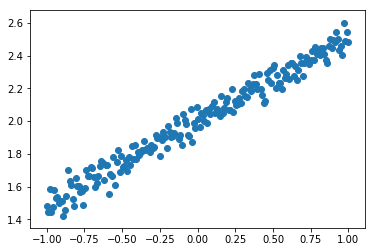

In [103]:
plt.scatter(X, Y)
plt.show()

In [104]:
X_train, Y_train = X[:160], Y[:160]

In [105]:
X_test, Y_test = X[160:], Y[160:] 

In [106]:
model = Sequential()

In [107]:
model.add(Dense(1,input_dim=1))

In [108]:
model.compile(loss='mse', optimizer='sgd')

In [109]:
for step in range(1001):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

train cost:  4.37377
train cost:  0.158894
train cost:  0.02595
train cost:  0.00837151
train cost:  0.00411391
train cost:  0.0030161
train cost:  0.00273177
train cost:  0.00265811
train cost:  0.00263903
train cost:  0.00263409
train cost:  0.00263281


In [110]:
cost = model.evaluate(X_test, Y_test, batch_size=40)

40/40 [==============================] - 0s


In [111]:
cost

0.0028812589589506388

In [112]:
W, b = model.layers[0].get_weights()

In [113]:
print('Weights=', W, '\nbiases=', b)

Weights= [[ 0.50641602]] 
biases= [ 2.00183678]


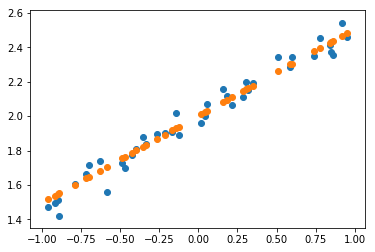

In [115]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.scatter(X_test, Y_pred)
plt.show()

## 分类

In [130]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

In [143]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [144]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

In [145]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [148]:
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [149]:
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [150]:
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [158]:
model.fit(X_train, y_train, batch_size=32,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.0429 - acc: 0.9903     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.0413 - acc: 0.9904     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.0417 - acc: 0.9905     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.0401 - acc: 0.9907     
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.0400 - acc: 0.9911     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.0392 - acc: 0.9916     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.0389 - acc: 0.9912     
Epoch 8/10
60000/60000 [==============================] - 3s - loss: 0.0385 - acc: 0.9916     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.0383 - acc: 0.9914     
Epoch 10/10
60000/60000 [==============================] - 3s - loss: 0.0373 - acc: 0.9922     


In [159]:
loss, accuracy = model.evaluate(X_test, y_test)

 9152/10000 [==========================>...] - ETA: 0s

In [160]:
print('test loss: ', loss)
print('test accuracy: ', accuracy)

test loss:  0.239371189924
test accuracy:  0.9614
